## Mapeo logístico
Autor: Geoff Boeing
Artículo (Journal): Boeing, G. 2016. "Visual Analysis of Nonlinear Dynamical Systems: Chaos, Fractals, Self-Similarity and the Limits of Prediction." Systems, 4 (4), 37. doi:10.3390/systems4040037.
Blog de publicación: http://geoffboeing.com/2015/03/chaos-theory-logistic-map/

*Realización de un mapa logístico y gráficas como resultados, diaramas de bifurcación y diagramas de fase.

> Código editado por J. Ernesto Tb.

In [1]:
import pynamical
from pynamical import simulate, bifurcation_plot, save_fig
import pandas as pd, numpy as np, IPython.display as display, matplotlib.pyplot as plt, matplotlib.cm as cm
%matplotlib inline

In [2]:
title_font = pynamical.get_title_font()
label_font = pynamical.get_label_font()

In [3]:
# run the logistic model for 20 generations for 7 growth rates between 0.5 and 3.5 then view the output
pops = simulate(num_gens=20, rate_min=0.5, rate_max=3.5, num_rates=7)
pops.applymap(lambda x: '{:03.3f}'.format(x))

,0.5,1.0,1.5,2.0,2.5,3.0,3.5
0,0.500,0.500,0.500,0.500,0.500,0.500,0.500
1,0.125,0.250,0.375,0.500,0.625,0.750,0.875
2,0.055,0.188,0.352,0.500,0.586,0.562,0.383
3,0.026,0.152,0.342,0.500,0.607,0.738,0.827
4,0.013,0.129,0.338,0.500,0.597,0.580,0.501
5,0.006,0.112,0.335,0.500,0.602,0.731,0.875
6,0.003,0.100,0.334,0.500,0.599,0.590,0.383
7,0.002,0.090,0.334,0.500,0.600,0.726,0.827
8,0.001,0.082,0.334,0.500,0.600,0.597,0.501
9,0.000,0.075,0.333,0.500,0.600,0.722,0.875


In [4]:
def get_colors(cmap, n, start=0., stop=1., alpha=1., reverse=False):
    '''return n-length list of rgba colors from the passed colormap name and alpha,
       limit extent by start/stop values and reverse list order if flag is true'''
    colors = [cm.get_cmap(cmap)(x) for x in np.linspace(start, stop, n)]
    colors = [(r, g, b, alpha) for r, g, b, _ in colors]
    return list(reversed(colors)) if reverse else colors

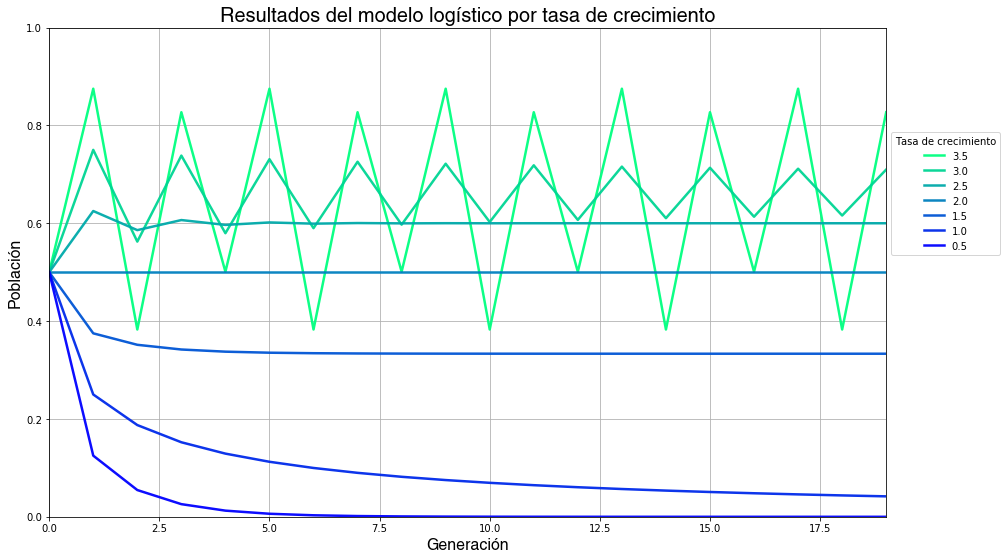

In [19]:
# G´rafica de los resultados del mapeo logistico para las 7 diferentes tasas de crecimiento
color_list = get_colors('winter', n=len(pops.columns), start=0., stop=1)
for color, rate in reversed(list(zip(color_list, pops.columns))):
    ax = pops[rate].plot(kind='line', figsize=[15, 9], linewidth=2.5, alpha=0.95, c=color)
ax.grid(True)
ax.set_ylim([0, 1])
ax.legend(title='Tasa de crecimiento', loc=3, bbox_to_anchor=(1, 0.525))
ax.set_title('Resultados del modelo logístico por tasa de crecimiento', fontproperties=title_font)
ax.set_xlabel('Generación', fontproperties=label_font)
ax.set_ylabel('Población', fontproperties=label_font)

save_fig('mapeo-logistico-tasas')
plt.show()

# Bifurcación y el camino al caos

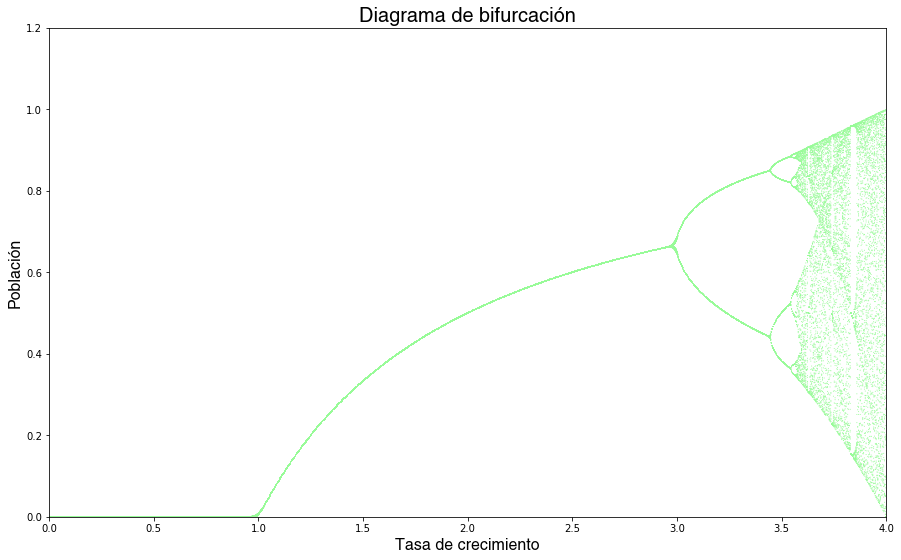

In [27]:
#Gráfica del diagrama de bifurcación para 200 generaciones, se arrojan las primeras 100 filas
# plot the bifurcation diagram for 200 generations, but this time throw out the first 100 rows
# 200-100=100, so we still have 100 generations in the plot, just like in the previous cell
# this will show us only the attractors (aka, the values that each growth rate settles on over time)
pops = simulate(num_gens=100, rate_min=0, rate_max=4, num_rates=1000, num_discard=100)
bifurcation_plot(pops, title= 'Diagrama de bifurcación', xlabel="Tasa de crecimiento", ylabel="Población",
                 color= "palegreen", filename='mapa-logistico-bifurcacion-1', figsize=(15,9), 
                 xmin= 0., xmax=4., ymin= 0., ymax=1.2)

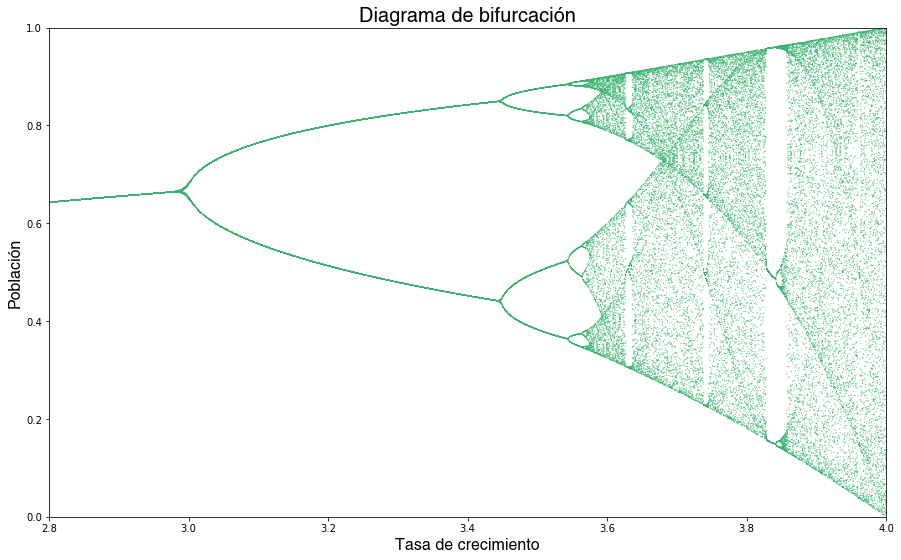

In [31]:
# corre el modelo por 200 generaciones a través de 1,000 pasos de tasas de crecimiento de 2.8 a 4
# y grafica el diagrama de bifurcacion
# Esta grafica es un acercamiento al primer grafico y muestra el periodo doble del camino al caos 
# this plot is a zoomed-in look at the first plot and shows the period-doubling path to chaos
pops = simulate(num_gens=100, rate_min=2.8, rate_max=4, num_rates=1000, num_discard=200, initial_pop=0.1)
bifurcation_plot(pops, xmin=2.8, xmax=4, title= 'Diagrama de bifurcación', xlabel="Tasa de crecimiento", ylabel="Población",
                 color= "mediumseagreen", figsize=(15,9), filename='mapeo-ligistico-bifurcacion-2')

# El comienzo del caos

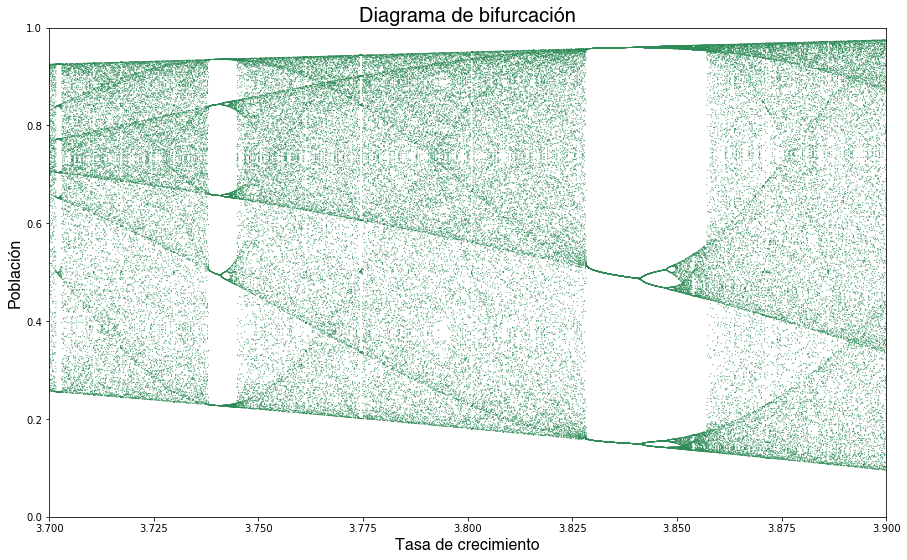

In [35]:
# corre el modelo por 200 generaciones a través de 1,000 pasos de tasas de crecimiento de 3.7 a 3.9 
# y grafica el diagrama de bifurcació
# Esta grafica es un acercamiento al primer c¿gráfico que muestra más detalles en los regimenes caoticos
pops = simulate(num_gens=100, rate_min=3.7, rate_max=3.9, num_rates=1000, num_discard=100)
bifurcation_plot(pops, xmin=3.7, xmax=3.9, title= 'Diagrama de bifurcación', xlabel="Tasa de crecimiento", ylabel="Población",
                 filename='mapeo-logistico-bifurcacion-3', color = "seagreen", figsize=(15,9))

# Fractales y atractores extraños

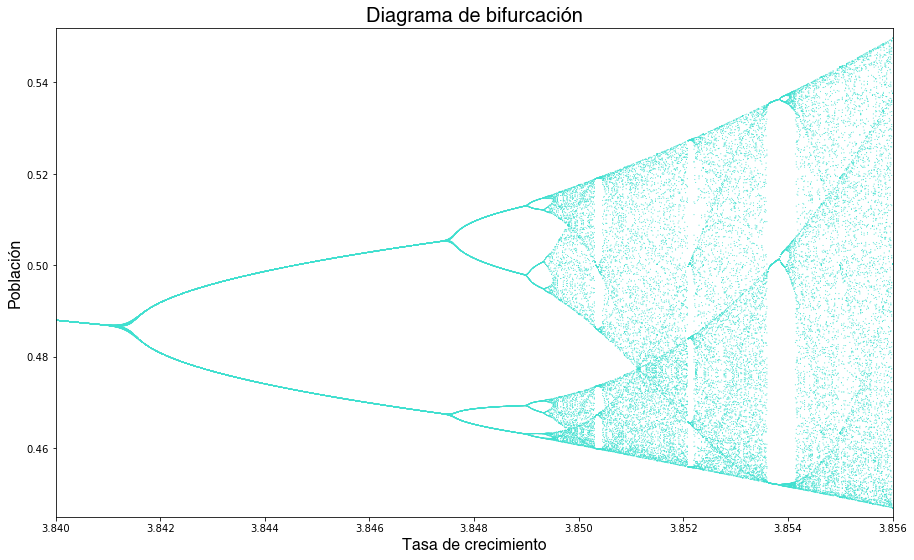

In [36]:
# run the model for 500 generations across 1,000 growth rate steps from 3.84 to 3.856, and plot the bifurcation diagram
# throw out the first 300 generations, so we end up with 200 generations in the plot
# this plot is a zoomed-in look at the first plot and shows the same structure we saw at the macro-level
pops = simulate(num_gens=200, rate_min=3.84, rate_max=3.856, num_rates=1000, num_discard=300)
bifurcation_plot(pops, xmin=3.84, xmax=3.856, ymin=0.445, ymax=0.552, filename='mapeo-logistico-bifurcacion-4',
                title= 'Diagrama de bifurcación', xlabel="Tasa de crecimiento", ylabel="Población",
                 figsize = (15,9), color= "turquoise")

> Diagramas de fase

In [1]:
import pynamical
from pynamical import simulate, save_fig, phase_diagram, phase_diagram_3d
import pandas as pd, numpy as np, matplotlib.pyplot as plt, IPython.display as IPdisplay
%matplotlib inline

In [2]:
title_font = pynamical.get_title_font()
label_font = pynamical.get_label_font()

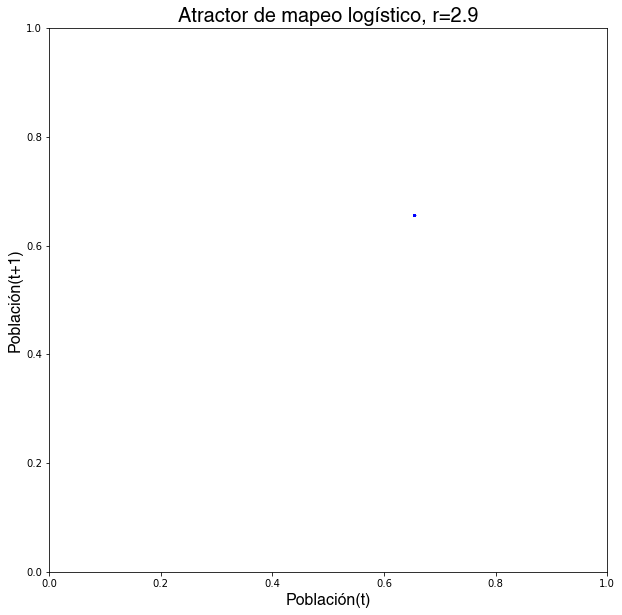

In [3]:
# Realiza un diagrama de fase para 100 generaciones para el parámetro de tasa de crecimiento r=3.1
# Muestra puntos convergiendo en 0.655 porque el mapa logistico tiene un punto fijo atractor en 0.655 cuando r=2.9
pops = simulate(num_gens=100, rate_min=2.9, num_rates=1, num_discard=100)
phase_diagram(pops, title='Atractor de mapeo logístico, r=2.9',figsize= (10,10), xlabel='Población(t)',
              ylabel='Población(t+1)', color= "winter", size=25, filename= "atractor1")

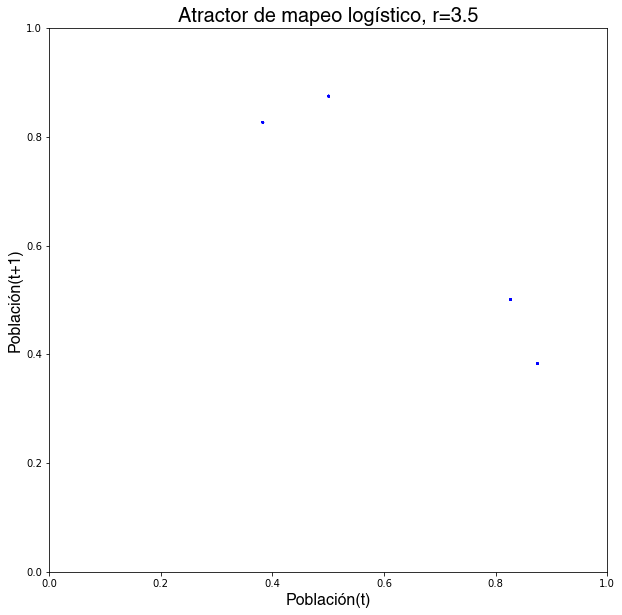

In [4]:
# Realiza un diagrama de fase para 100 generaciones para el parámetro de tasa de crecimiento r=4
# Muestra 4 puntos porque el mapa logístico tiene un período de 4 cuando r=3.5
pops = simulate(num_gens=100, rate_min=3.5, num_rates=1, num_discard=100)
phase_diagram(pops, title='Atractor de mapeo logístico, r=3.5',figsize= (10,10), xlabel='Población(t)',
              ylabel='Población(t+1)', color= "winter", size=25, filename= "atractor2")

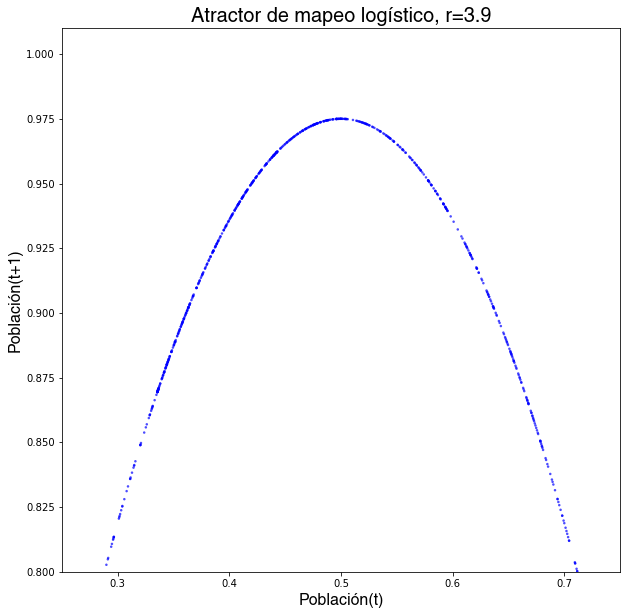

In [5]:
# Realiza un diagrama de fase por 2,000 generaciones para la tasa de crecimiento de 3.9
# la gráfica revela el atractor extraño - el mapa logístico es caótico cuando r=3.9
pops = simulate(num_gens=2000, rate_min=3.9, num_rates=1)
phase_diagram(pops, xmin=0.25, xmax=0.75, ymin=0.8, ymax=1.01,  title='Atractor de mapeo logístico, r=3.9',
              figsize= (10,10), xlabel='Población(t)', ylabel='Población(t+1)', 
              color= "winter", size=25, filename= "atractor3")

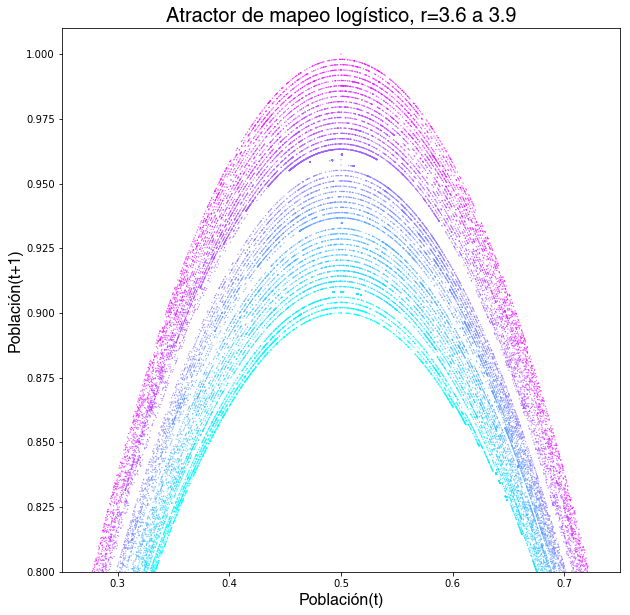

In [6]:
# Realiza un diagrama de fase para 2,000 generaciones a traves de 50 tasas de crecimiento de 3.6 a 4.0
# Cada tasa de cremiento caotico tiene su propia parábola
pops = simulate(num_gens=2000, rate_min=3.6, rate_max=4.0, num_rates=50)
phase_diagram(pops, xmin=0.25, xmax=0.75, ymin=0.8, ymax=1.01, title='Atractor de mapeo logístico, r=3.6 a 3.9',
              figsize= (10,10), xlabel='Población(t)', ylabel='Población(t+1)', 
              color= "cool", size=7, filename= "atractor4")

> Caos contra datos aleatorios

In [7]:
# A veces es dificil decir si una serie de tiempo es caotica o aleatoria
# Genera dos series de tiempo de 1,000 pasos, uno caotico y uno aleatorio
# genera 30,000 pasos de tiempo para las series caoticas pero solo mantiene las 1,000 finales (si el sistema esta evolucionado)
total_gens = 30000
gens = 1000
np.random.seed(1)

chaos_pops = simulate(num_gens=total_gens, rate_min=3.99, num_rates=1)
chaos_pops = chaos_pops.iloc[total_gens-gens:].reset_index().drop(labels='index', axis=1)

random_pops = pd.DataFrame(np.random.random(gens), columns=['value'])
time_series = pd.concat([chaos_pops, random_pops], axis=1)
time_series.columns = ['Caos', 'Aleatorio']
time_series.head()

,Caos,Aleatorio
0,0.900520,0.417022
1,0.357438,0.720324
2,0.916407,0.000114
3,0.305654,0.302333
4,0.846796,0.146756


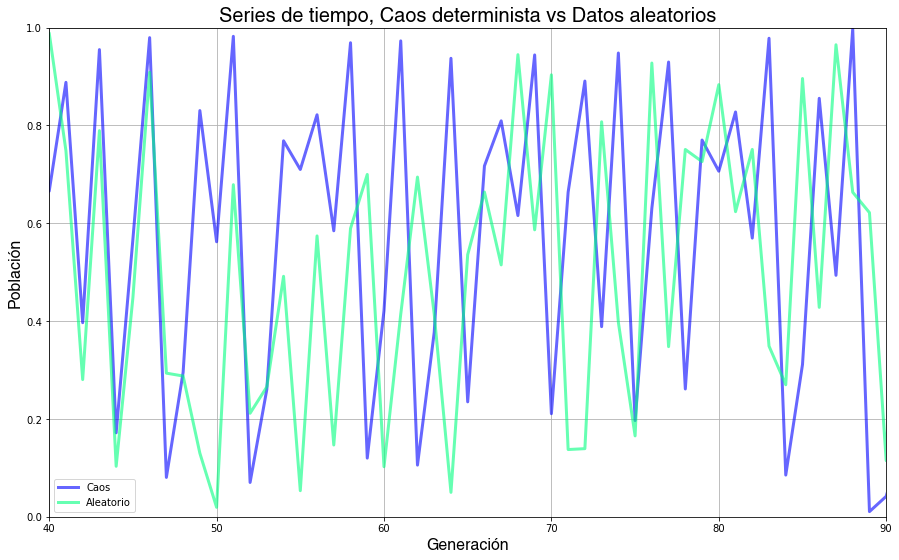

In [8]:
# grafica series de tiempo caóticas y aleatorias para mostrar como son a veces para diferenciarlas 
ax = time_series.plot(kind='line', figsize=[15, 9], linewidth=3, alpha=0.6, style=['#003399','#cc0000'], colormap="winter")
ax.grid(True)
ax.set_xlim(40, 90)
ax.set_ylim(0, 1)
ax.set_title('Series de tiempo, Caos determinista vs Datos aleatorios', fontproperties=title_font)
ax.set_xlabel('Generación', fontproperties=label_font)
ax.set_ylabel('Población', fontproperties=label_font)
ax.legend(loc=3)

save_fig('caos-vs-aleatorio-l')
plt.show()

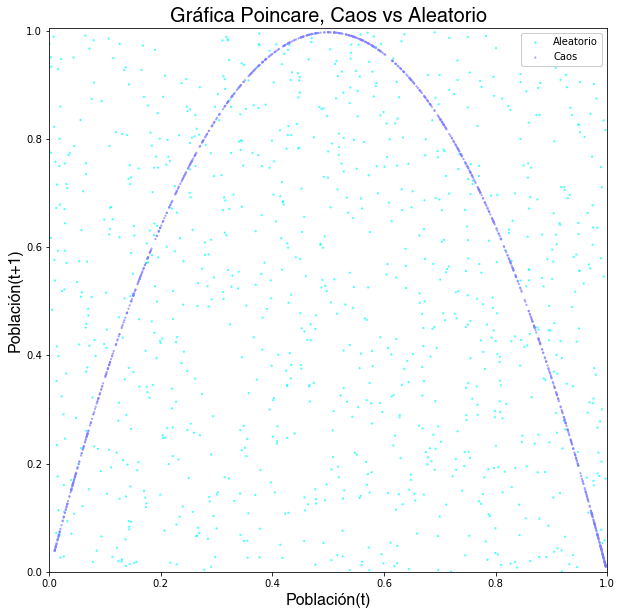

In [9]:
# Grafica los mismos dato como un diagrama de fase en 2D
pops = pd.concat([chaos_pops, random_pops], axis=1)
pops.columns = ['Caos', 'Aleatorio']
phase_diagram(pops, size=20, color="cool", ymax=1.005, legend=True, figsize=(10,10), 
              title = 'Gráfica Poincare, Caos vs Aleatorio', filename='atractor-logistico-caos-aleatorio',
              xlabel='Población(t)', ylabel='Población(t+1)')

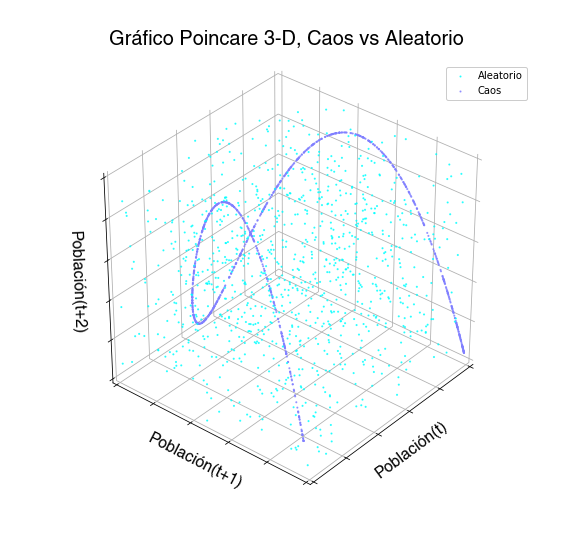

In [11]:
# Grafica los mimsos datos pero en un diagrama de fase en 3D 
phase_diagram_3d(pops, color="cool", filename='atractor-logistico-caos-aleatorio-3d',
                 title = 'Gráfico Poincare 3-D, Caos vs Aleatorio', xlabel='Población(t)',
                 ylabel='Población(t+1)', zlabel='Población(t+2)', legend=True,
                 legend_bbox_to_anchor=(0.94, 0.9), figsize= (10,10), elev=35, azim=220, dist=12, )

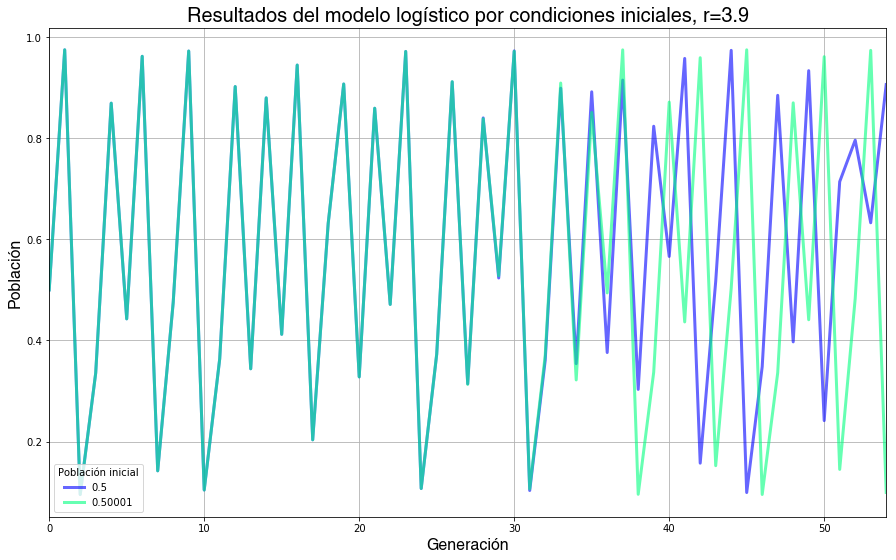

In [13]:
# plot the numeric output of the logistic model at growth rate 3.9 for 2 similar starting population values
# this demonstrates sensitive dependence on initial conditions, as they diverge through chaos
r = 3.9
pops1 = simulate(num_gens=55, rate_min=r, rate_max=4.0, num_rates=1, initial_pop=0.5)
pops2 = simulate(num_gens=55, rate_min=r, rate_max=4.0, num_rates=1, initial_pop=0.50001)
pops = pd.concat([pops1, pops2], axis=1)
pops.columns = ['0.5', '0.50001']
ax = pops.plot(kind='line', figsize=[15, 9], linewidth=3, alpha=0.6, style=['#003399','#cc0000'], colormap="winter")
ax.grid(True)
ax.set_title('Resultados del modelo logístico por condiciones iniciales, r={}'.format(r), fontproperties=title_font)
ax.set_xlabel('Generación', fontproperties=label_font)
ax.set_ylabel('Población', fontproperties=label_font)
ax.legend(title='Población inicial', loc=3)

save_fig('mapa-logistico-condicion-inicial')
plt.show()

> # animación en 3D

In [102]:
import pynamical
from pynamical import simulate, phase_diagram_3d
import pandas as pd, numpy as np, matplotlib.pyplot as plt, random, glob, os, IPython.display as IPdisplay
from PIL import Image
%matplotlib inline

In [103]:
title_font = pynamical.get_title_font()
label_font = pynamical.get_label_font()

In [104]:
save_folder = 'images/fase-animada'

In [106]:
# run the model for 4,000 generations for 50 growth rate parameters between 3.6 and 4.0
pops = simulate(num_gens=4000, rate_min=3.6, rate_max=4.0, num_rates=50)

In [108]:
# set a filename and create the plot
gif_filename = '05-diagrama-fase-logistico-3d-regimen-caotico'
working_folder = '{}/{}'.format(save_folder, gif_filename)
if not os.path.exists(working_folder):
    os.makedirs(working_folder)
    
fig, ax = phase_diagram_3d(pops, color='cool', color_reverse=False, show=False, save=False, xlabel='Población (t)',
                           ylabel='Población(t + 1)', 
                           zlabel='Población(t+2)')

# configure the initial viewing perspective
ax.elev = 25.
ax.azim = 321.
ax.dist = 11.0

# zoom in to reveal the 3-D structure of the strange attractor
for n in range(0, 100):
    if n <= 18:
        ax.azim = ax.azim-0.2 #begin by rotating very slowly
    if n >= 19 and n <= 29:
        ax.azim = ax.azim-10
        ax.dist = ax.dist-0.05
        ax.elev = ax.elev-2 #quickly whip around to the other side
    if n >= 33 and n <= 49:
        ax.azim = ax.azim+3
        ax.dist = ax.dist-0.55
        ax.elev = ax.elev+1.4 #zoom into the center
    if n >= 61 and n <= 79:
        ax.azim = ax.azim-2
        ax.elev = ax.elev-2
        ax.dist = ax.dist+0.2 #pull back and pan up
    if n >= 80:
        ax.azim = ax.azim-0.2 #end by rotating very slowly
    
    # add a figure title to each plot then save the figure to the disk
    fig.suptitle('Logistic Map, r=3.6 to r=4.0', fontsize=16, x=0.5, y=0.85)
    plt.savefig('{}/{}/img{:03d}.png'.format(save_folder, gif_filename, n), bbox_inches='tight')

# don't display the static plot
plt.close()

# load all the static images into a list then save as an animated gif
gif_filepath = '{}/{}.gif'.format(save_folder, gif_filename)
images = [Image.open(image) for image in glob.glob('{}/*.png'.format(working_folder))]
gif = images[0]
gif.info['duration'] = 10 #milliseconds per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])
IPdisplay.Image(url=gif_filepath)